# SVMs are Cool

Name: Peter Rock

(OK, so this notebook isn't the prettiest one I've made for participation. Sorry about that.)

Here at the top I'm importing my necessary components. We're going to set up some toy datasets, create Support Vector Machines (Support Vector Classifiers, or SVCs), and do some plotting / analysis. I also define the show_decision_surface function we've used in the past. I idd amend it from previous versions so we can also visualize support vectors as circled samples, and added a (pretty hard-coded) title.

In [1]:
import matplotlib.pyplot as plt
import sklearn.datasets as data
import sklearn.svm
import numpy as np

In [2]:
def show_decision_surface(model, X, y, support_vectors, index, ax=None):
    """
    Helper function to visualize the decision surface of the trained model
    :param model with predict method
    :return: None
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x_grid, y_grid = np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1)
    xx, yy = np.meshgrid(x_grid, y_grid)
    r1, r2 = xx.reshape(-1, 1), yy.reshape(-1, 1)
    grid = np.hstack((r1, r2))
    y_hat = model.predict(grid).reshape(-1, )
    zz = y_hat.reshape(xx.shape)

    if ax is None:
        plt.contourf(xx, yy, zz, cmap='PiYG')
        plt.scatter(X[:, 0], X[:, 1], c=y)
        plt.scatter(support_vectors[:,0],support_vectors[:,1],facecolors='none', edgecolors='c')
        plt.title("SVM after "+str(index)+" Epochs")
        plt.show()
    else:
        ax.contourf(xx, yy, zz, cmap='PiYG')
        ax.scatter(X[:, 0], X[:, 1], c=y)
        ax.scatter(support_vectors[:,0],support_vectors[:,1],facecolors='none', edgecolors='c')
        ax.set_title = ("SVM after "+str(index)+" Epochs")
        


### Creating separable data

First, we'll create a few separable datasets. Our binary_blobs dataset is going to be pretty cleanly separable. The confusing_blobs dataset should have some tricky nonlinearity. And the circle_blobs dataset will be cleary non-linearly-separable.

In [3]:
binary_blobs = data.make_blobs(centers=2, cluster_std=3, random_state=3623)
confusing_blobs = data.make_blobs(centers=2, cluster_std=3, random_state = 230306)
circle_blobs = data.make_circles(random_state=3623)

### Visualizing SVM Epochs on binary_blobs

The code below loops over a different value for the number of Epochs (max_iter) our SVC object has to train. Answer the questions in the cells below the loop.

(Sorry for the solver terminated errors)

#### Q1: On the binary_blobs dataset, how many Epochs does it take to get 100% accuracy on the training dataset (i.e. when does accuracy = 1.0)?

It takes 3 epochs to get to 100\% accuracy on the training set.

#### Q2: Does the decision boundary change on future Epoch amounts after we have found a decision boundary that works perfectly on the training dataset? Does it ever stop moving?

Yes, the decision boundary seems to move between 3 and 4 and 4 and 5 epochs; however, the boundary stops changing after 5 epochs or so.

C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=0).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 0: 0.5


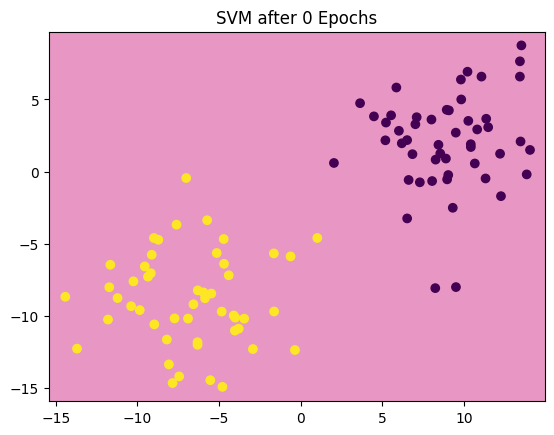

accuracy for i = 1: 0.97


C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


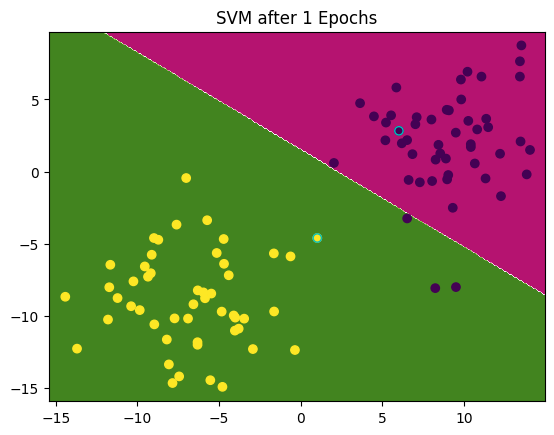

C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 2: 0.99


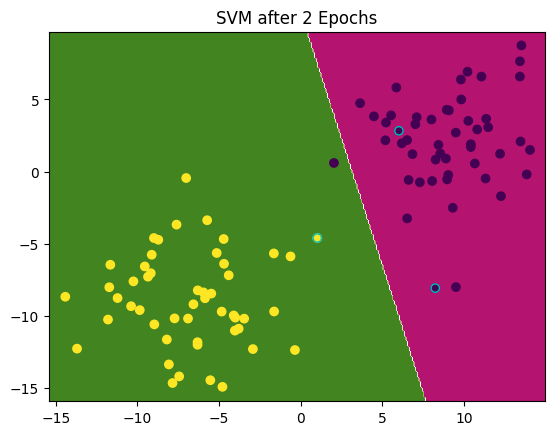

C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 3: 1.0


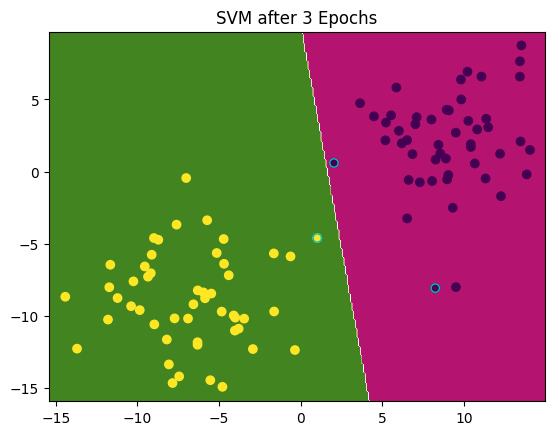

C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 4: 1.0


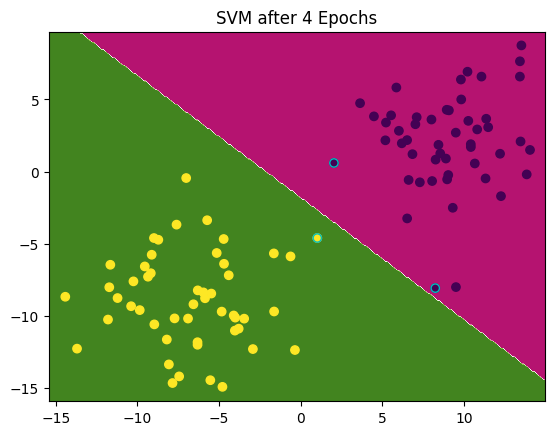

accuracy for i = 5: 1.0


C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


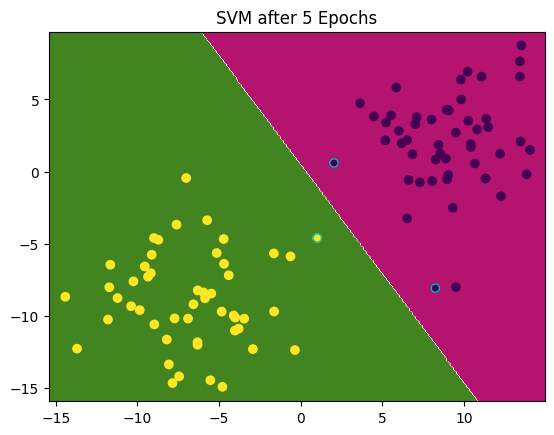

accuracy for i = 6: 1.0


C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=6).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


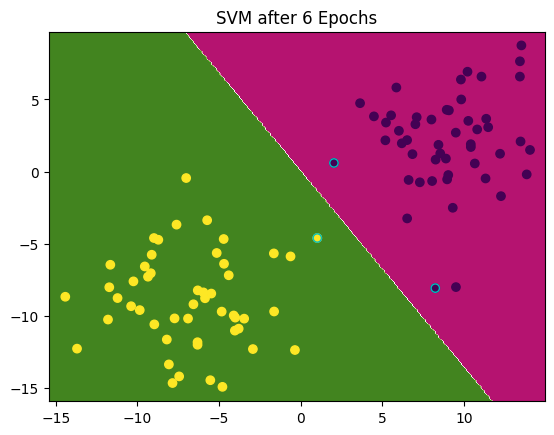

accuracy for i = 7: 1.0


C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=7).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


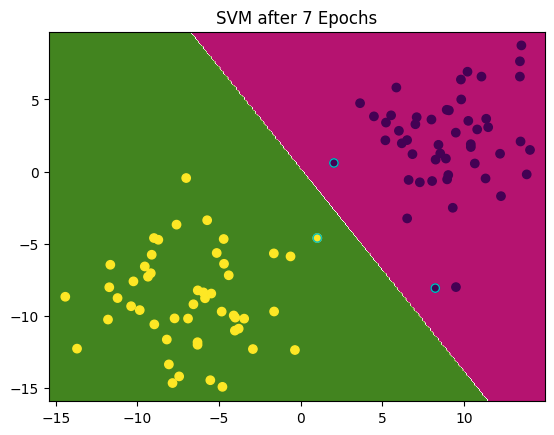

accuracy for i = 8: 1.0


C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=8).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


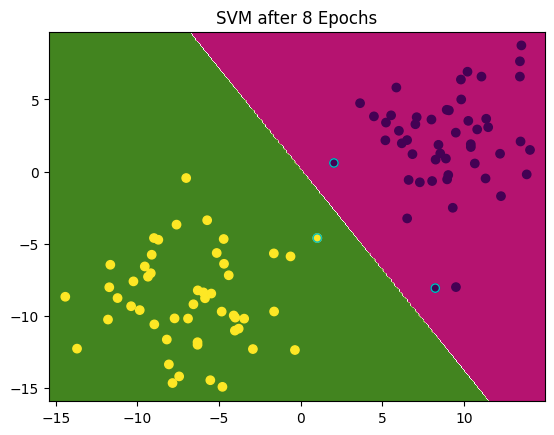

accuracy for i = 9: 1.0


C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=9).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


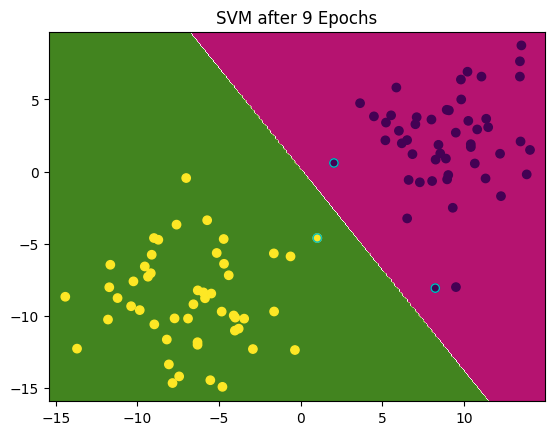

In [4]:
%matplotlib inline
x = binary_blobs[0]
y = binary_blobs[1]

for i in range(10):
    svm = sklearn.svm.SVC(max_iter=i,kernel='linear')
    svm.fit(x,y) 
    print("accuracy for i = " + str(i) + ": " + str(svm.score(x,y)))
    show_decision_surface(svm, x, y, svm.support_vectors_, i)

### Exploring Additional Datasets

Explore the use of the confusing_blobs dataset and the circle_blobs dataset. Write any additional thoughts below. Q3 is open ended, with some suggested topics. Choose one or more of them to answer.

#### Q3: Discuss some generalization of the circle_blobs. Options include:
##### Is the confusing_blobs dataset as easily separable? How long does it take to create a stable decision boundary?
##### What happens when you feed in the circle_blobs to a linear kernel SVM?
##### What happens when you use other kernels across the datasets? Do the Support Vectors change? Does the decision boundary change?
##### What other interesting explorations did you decide to do? Did you look at some real-world data? Did you play with scaling and normalization?

While the ```confusing_blobs``` dataset does take some time for the SVM classifier to figure out, it does, eventually
come to some reasonable decision boundaries for the linear kernel. It does, however, oscillate between the possible
boundaries giving us accuracies of either 99\% on the training set or 95\%. 

When we change the kernel type to ```"poly"```, the classifier does worse, mostly because there is not really a better 
low-order, non-linear separator for the given training set. This kernel choice also suffers from a lack of stability.

For the ```"rbf"``` kernel, we see some improvements over the previous kernels. Namely, this kernel seems to stabilize
as we approach the larger epochs, and something similar seems to happen for the ```"sigmoid"``` kernel, at least on this
data set.


For the ```circle_blobs```, the linear kernel produces absolute garbage, which is unsurprising for anyone that has tried
to separate concentric circles with a straight line before. Similar garbage is spat out for the ```"poly"``` and 
```"sigmoid"``` kernels, which is again unsurprising because the boundary between the two circles is an implicitly 
defined level curve, and hence not very amenable to separation by graphs curves. Unsurprisingly, when we use the kernel
that builds radial functions, ```"rbf"```, we get a near perfect separation of the circle data.

accuracy for i = 0: 0.5


C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=0).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


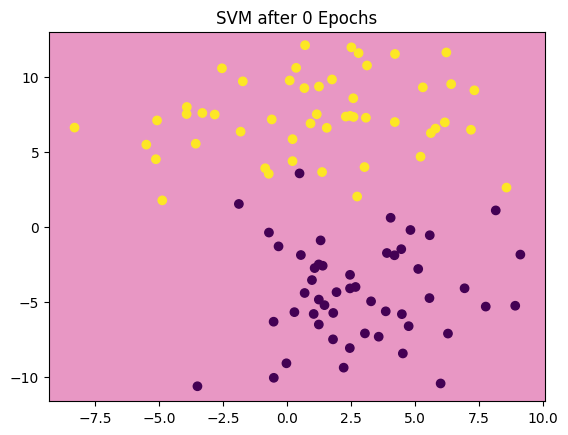

C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 1: 0.96


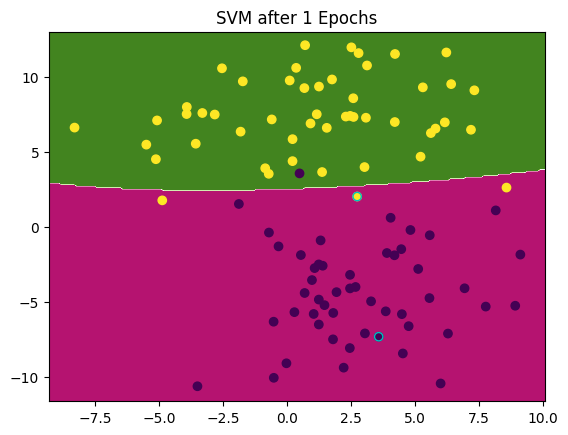

accuracy for i = 2: 0.99


C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


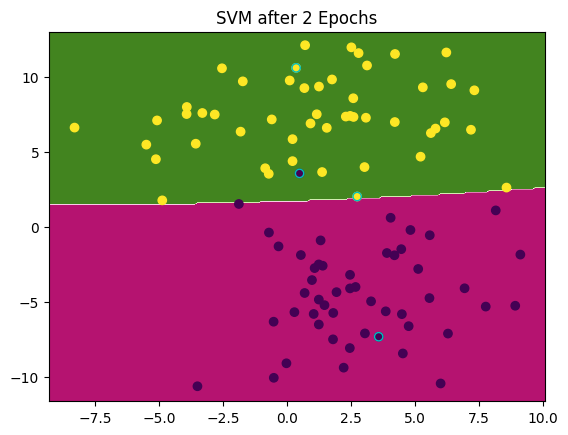

accuracy for i = 3: 0.98


C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


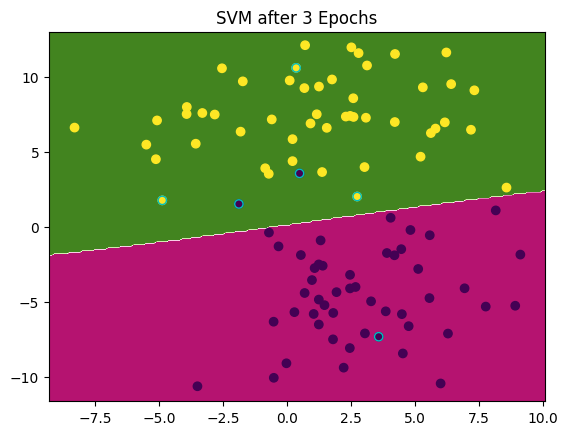

accuracy for i = 4: 0.98


C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


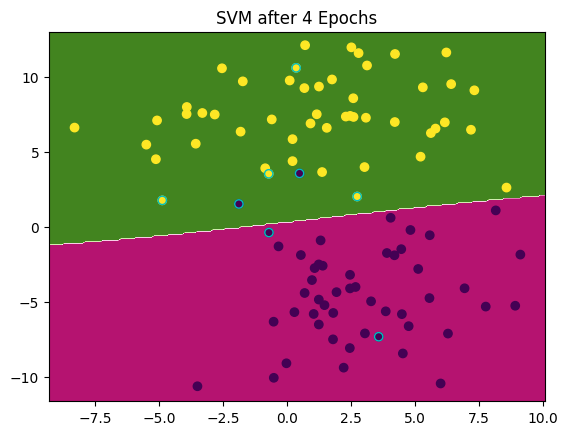

C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 5: 0.97


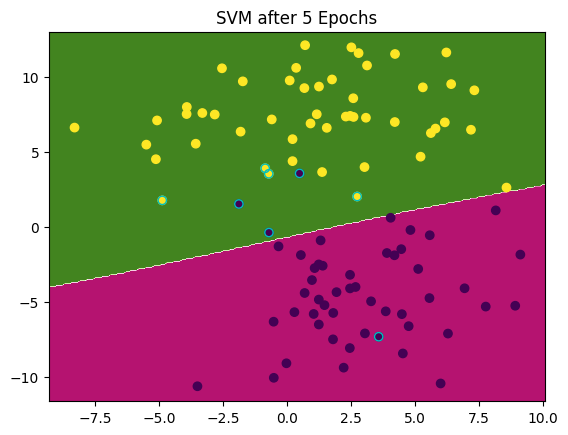

accuracy for i = 6: 0.98


C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=6).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


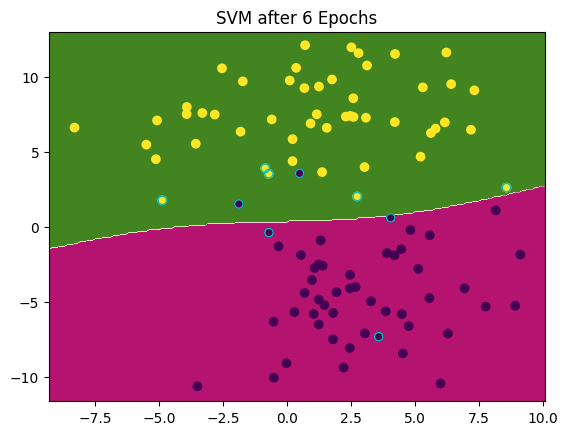

accuracy for i = 7: 0.95


C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=7).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


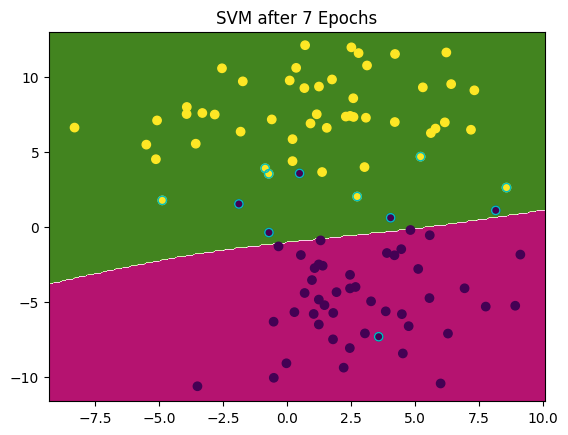

accuracy for i = 8: 0.97


C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=8).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


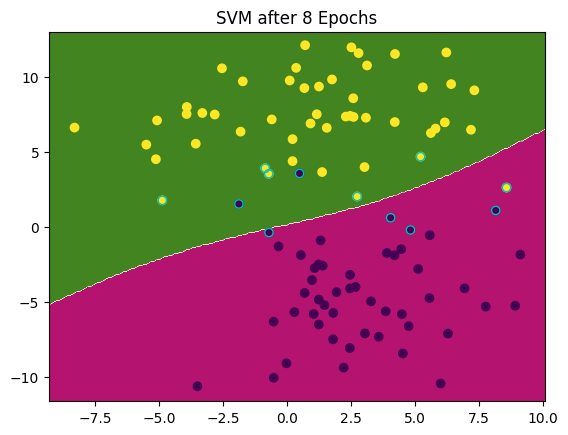

accuracy for i = 9: 0.97


C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=9).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


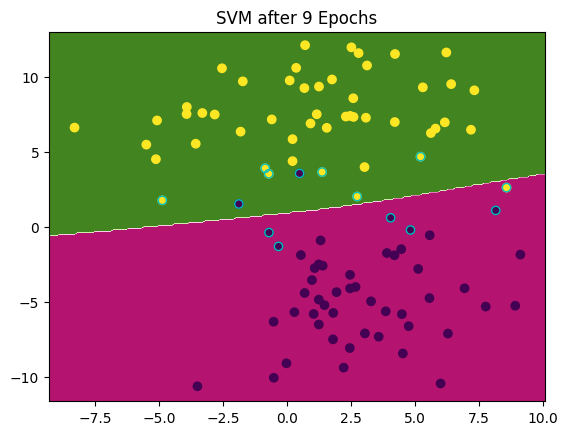

accuracy for i = 10: 0.98


C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


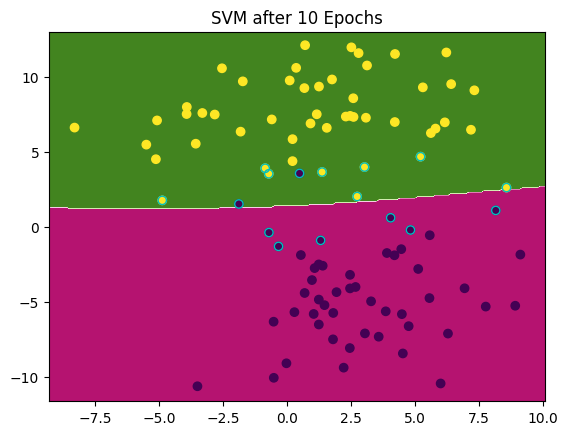

accuracy for i = 11: 0.97


C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=11).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


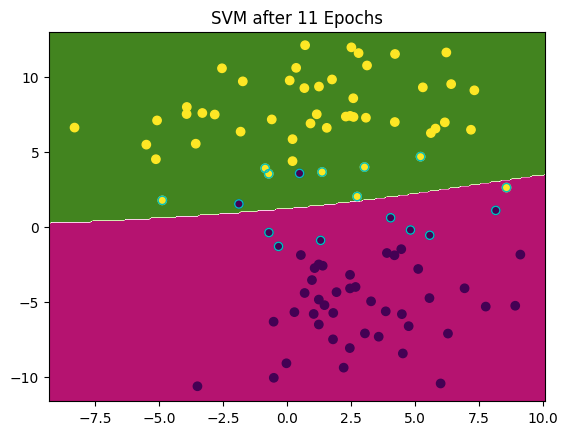

accuracy for i = 12: 0.97


C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=12).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


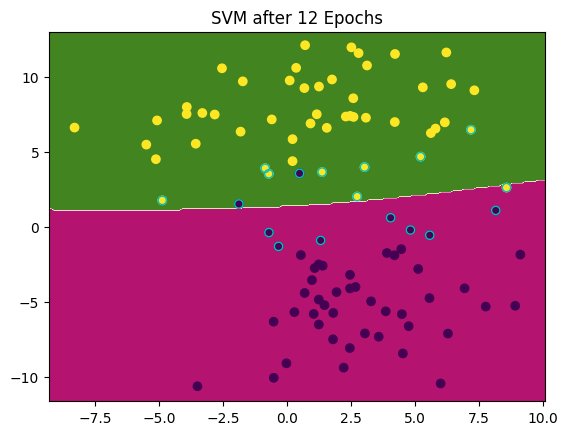

accuracy for i = 13: 0.97


C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=13).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


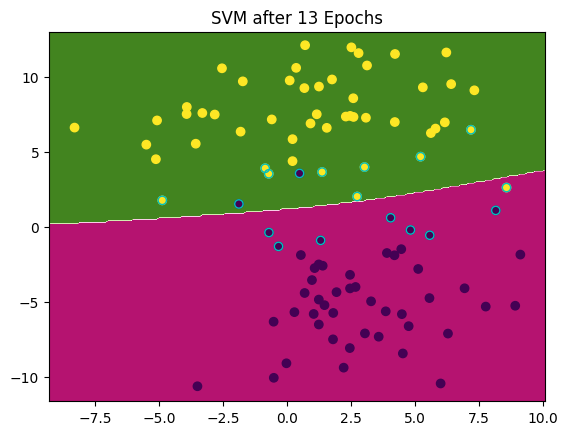

accuracy for i = 14: 0.98


C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=14).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


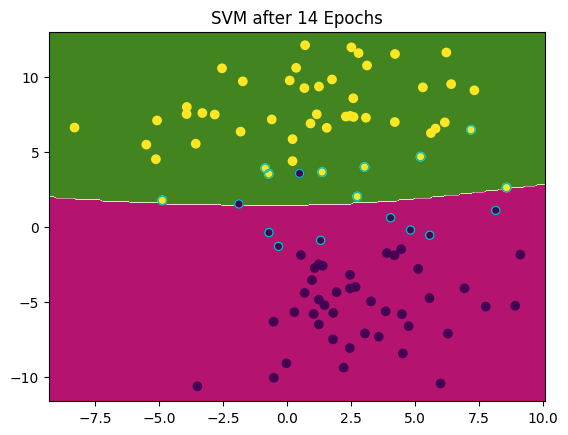

In [12]:
%matplotlib inline
x = confusing_blobs[0] # CONSIDER USING THE CONFUSING_BLOBS and / or CIRCLE_BLOBS
y = confusing_blobs[1] # CONSIDER USING THE CONFUSING_BLOBS and / or CIRCLE_BLOBS

for i in range(15): # CONSIDER CHANGING THE MAX NUMBER OF ITERATIONS
    svm = sklearn.svm.SVC(max_iter=i,kernel='sigmoid') # CONSIDER CHANGING THE KERNEL
    svm.fit(x,y) 
    print("accuracy for i = " + str(i) + ": " + str(svm.score(x,y)))
    show_decision_surface(svm, x, y, svm.support_vectors_, i)

accuracy for i = 0: 0.5


C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=0).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


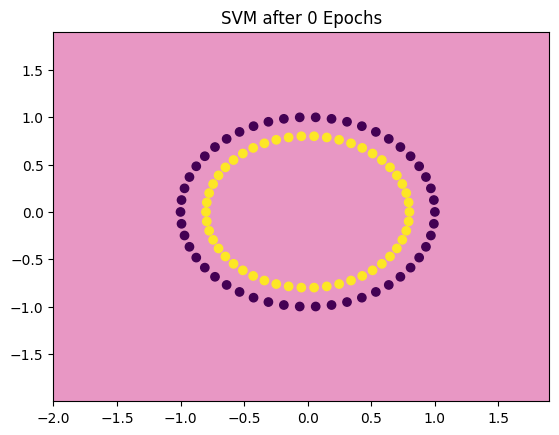

C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy for i = 1: 0.67


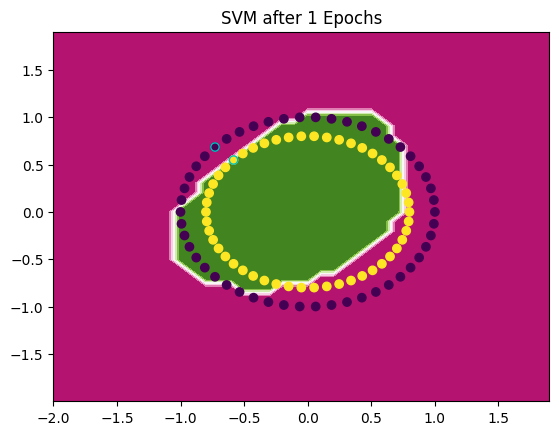

accuracy for i = 2: 0.82


C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


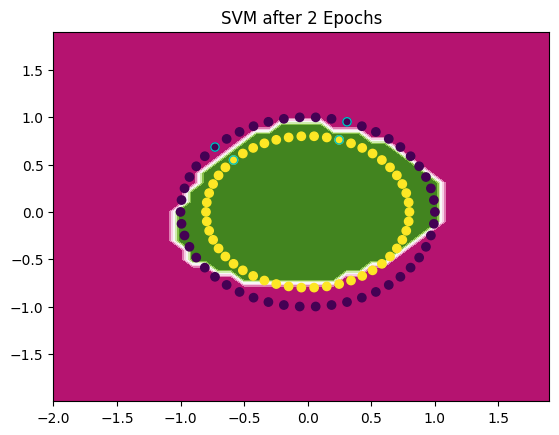

accuracy for i = 3: 1.0


C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


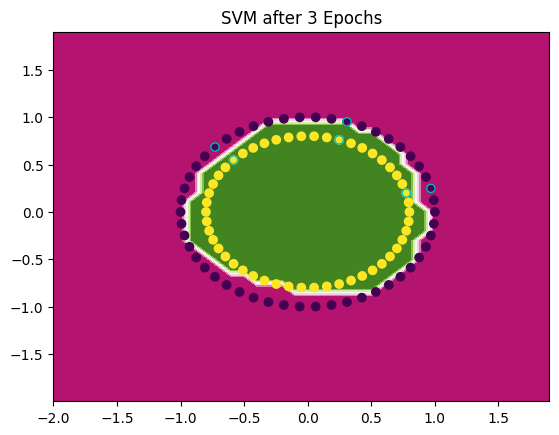

accuracy for i = 4: 1.0


C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


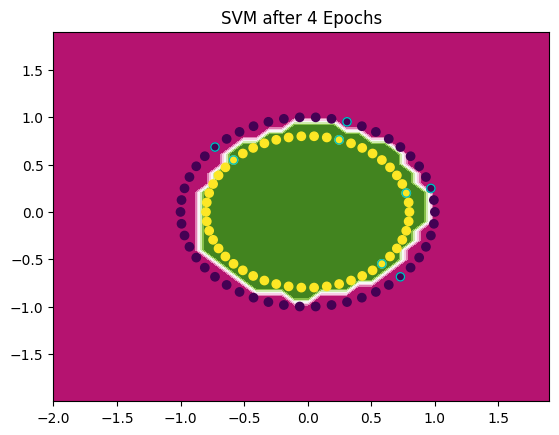

accuracy for i = 5: 1.0


C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


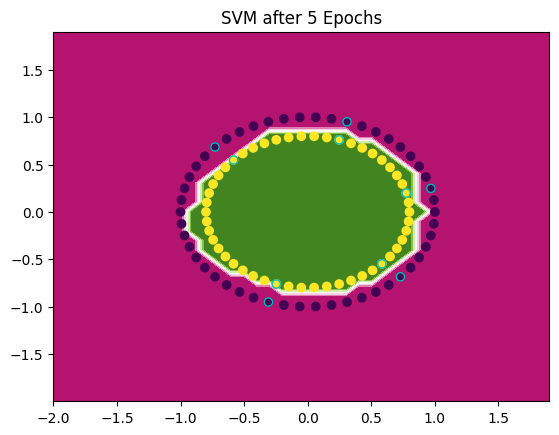

accuracy for i = 6: 1.0


C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=6).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


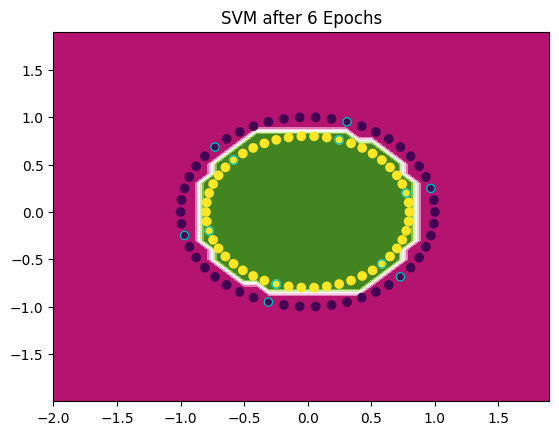

accuracy for i = 7: 1.0


C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=7).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


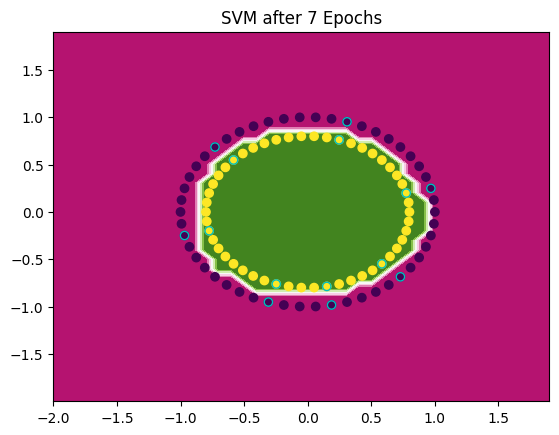

accuracy for i = 8: 1.0


C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=8).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


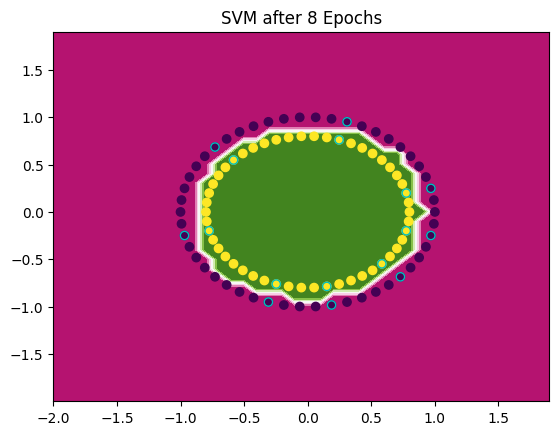

accuracy for i = 9: 1.0


C:\Users\pero5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=9).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


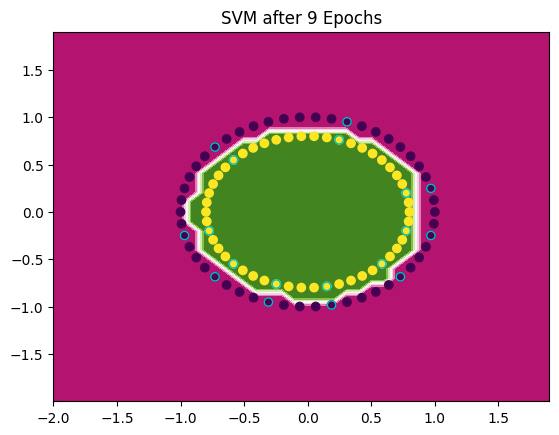

In [16]:
%matplotlib inline
x = circle_blobs[0] # CONSIDER USING THE CONFUSING_BLOBS and / or CIRCLE_BLOBS
y = circle_blobs[1] # CONSIDER USING THE CONFUSING_BLOBS and / or CIRCLE_BLOBS

for i in range(10): # CONSIDER CHANGING THE MAX NUMBER OF ITERATIONS
    svm = sklearn.svm.SVC(max_iter=i,kernel='rbf') # CONSIDER CHANGING THE KERNEL
    svm.fit(x,y) 
    print("accuracy for i = " + str(i) + ": " + str(svm.score(x,y)))
    show_decision_surface(svm, x, y, svm.support_vectors_, i)